<a href="https://colab.research.google.com/github/SammyGbabs/Linear-Regression-Summative/blob/main/Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('Temperature.csv')

In [4]:
# Print some part of the dataset.
df.head()

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Aalborg,Denmark,5.69,yes,yes,57.03,9.92,7.52
1,Aberdeen,United Kingdom,65.11,yes,yes,57.17,-2.08,8.10
2,Abisko,Sweden,9.85,yes,yes,63.35,18.83,0.20
3,Adana,Turkey,79.62,no,yes,36.99,35.32,18.67
4,Albacete,Spain,46.06,yes,yes,39.00,-1.87,12.62


In [5]:
# Initialize LabelEncoders for each categorical feature
le_city = LabelEncoder()
le_country = LabelEncoder()
le_eu = LabelEncoder()
le_coastline = LabelEncoder()

# Encode each feature and replace the original columns
df['city'] = le_city.fit_transform(df['city'])
df['country'] = le_country.fit_transform(df['country'])
df['EU'] = le_eu.fit_transform(df['EU'])
df['coastline'] = le_coastline.fit_transform(df['coastline'])

# Print the head of the dataframe to check the transformations
print(df.head())

   city  country  population  EU  coastline  latitude  longitude  temperature
0     0        9        5.69   1          1     57.03       9.92         7.52
1     1       36       65.11   1          1     57.17      -2.08         8.10
2     2       32        9.85   1          1     63.35      18.83         0.20
3     3       34       79.62   0          1     36.99      35.32        18.67
4     4       31       46.06   1          1     39.00      -1.87        12.62


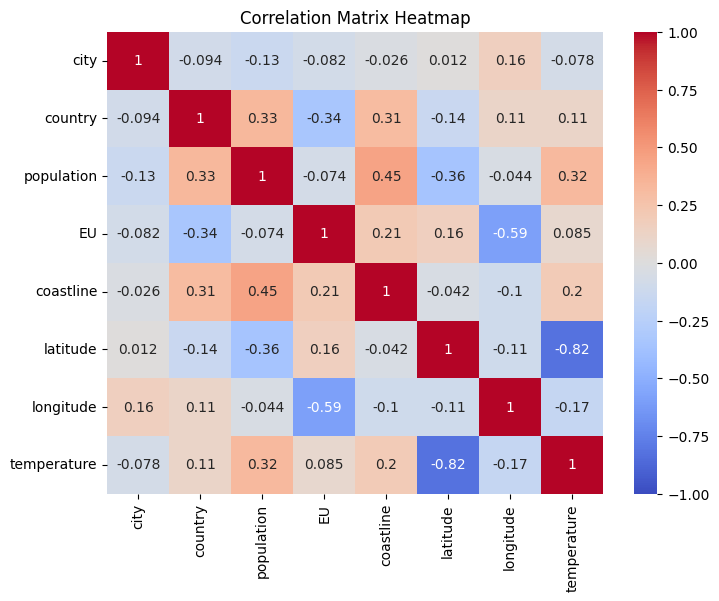

In [6]:
#calculating correlation matrix and plot the heatmap in order to get the important colums
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
# Display the correlation with the target variable (temperature)
correlation_with_target = correlation_matrix['temperature'].sort_values(ascending=False)
print(correlation_with_target)

temperature    1.000000
population     0.323444
coastline      0.199414
country        0.114270
EU             0.085251
city          -0.078016
longitude     -0.169308
latitude      -0.824105
Name: temperature, dtype: float64


Based on the printed correlation with target, I set a threshold of 0.1, which means that columns with an absolute correlation below this threshold will be dropped. Therefore columns that will be dropped are;

1. Country (0.11): Although the correlation is slightly above the threshold of |0.1|, it is still quite low and does not provide significant information about the temperature. Thus, it is not expected to have a strong influence on the model's performance.

2. EU (0.085): The correlation value is below the threshold of |0.1|, indicating a very weak relationship with the temperature. Including this column is unlikely to improve the model's predictive accuracy.

3. City (-0.078): The correlation value is below the threshold of |0.1| and is negative, indicating an even weaker relationship with the temperature. This suggests that the specific city name does not provide useful information for predicting temperature and can be excluded.

4. Longitude (-0.169): Although the correlation is higher than the other dropped columns, it is still relatively low and negative. This means that the longitude does not strongly influence the temperature and might introduce noise into the model rather than useful information.

In [8]:
# Drop columns with low correlation
df1 = df.drop(['country', 'EU', 'city', 'longitude'], axis=1)

#Checkig the remaining columns that are not dropped
print(df1.columns)

Index(['population', 'coastline', 'latitude', 'temperature'], dtype='object')


In [9]:
# Define features and target
features = ['population', 'coastline', 'latitude']
target = 'temperature'

X = df1[features]
Y = df1[target]

#Train-Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# Initialize the Scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initializing the Linear Regression Model
model = LinearRegression()

In [11]:
# Training the Model
model.fit(X_train_scaled, Y_train)

# Making Predictions
Y_train_pred = model.predict(X_train_scaled)
Y_test_pred = model.predict(X_test_scaled)

In [20]:
# Evaluate the model on the test set
mse_test = mean_squared_error(Y_test, Y_test_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
test_score = model.score(X_test_scaled, Y_test) * 100

# Evaluate the model on the training set
mse_train = mean_squared_error(Y_train, Y_train_pred)
mae_train = mean_absolute_error(Y_train, Y_train_pred)
train_score = model.score(X_train_scaled, Y_train) * 100


In [21]:
# Print the evaluation metrics for the test set
print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Test R-squared (R²) score: {test_score:.4f}")

# Print the evaluation metrics for the training set
print(f"Train Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Train Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Train R-squared (R²) score: {train_score:.4f}")

Test Mean Squared Error (MSE): 2.3072
Test Mean Absolute Error (MAE): 1.1883
Test R-squared (R²) score: 76.8227
Train Mean Squared Error (MSE): 4.0271
Train Mean Absolute Error (MAE): 1.6433
Train R-squared (R²) score: 69.4894


In [25]:
#Saving my model using pickle
with open('temperature.pkl', 'wb') as file:
    pk.dump(model, file)